In [5]:
#This cell imports the required modules to the notebook
#RUN THIS CELL BEFORE ANY OTHER CODE IS RUN
import matplotlib.pyplot as plt     #imports graph plotting library
import astropy.io.fits as ast       #imports FITS manipulation library
import numpy as np                  #imports numerical manipulation library
import random                       #imports module to generate random numbers for monte carlo error propagation

#magic function that forces plots to appear in this notebook
%matplotlib inline                  
plt.ion()                           #function that loads plotting library in "interactive mode"

from astropy.utils.data import get_pkg_data_filename   #imports function to get filename of data file
from scipy.stats import sem

print("Required Libraries Loaded Successfully")

def graderr(R, err, n): #user defined function does monte carlo error propagation
    """
    function for calculating the error in the gradient, using a monte carlo error propagation philosophy
    """
    grads = [[] for count in range(n)]                 #initialises list of lists, with indices [iteration][latitude]
    for i in range(n):                                 #loops through randomisation process n times
        randR = np.zeros(len(R))                       #initialises list of random R values
        for j in range(len(R)):                        #loops through the random function to form the list
            randR[j] = random.uniform(R[j]-err[j], R[j]+err[j]) #generates random number within bounds of error bars
        grads[i] = np.gradient(randR)                  #finds the gradient of the random R list generated above
        
    graderr = np.zeros(len(R))                         #initialises the list of gradient errors
    for i in range(len(R)):                            #loops through list of error calculation from the lists of random R
        gradforpoint = np.zeros(n)                     #initialises restructured list of iterations of grad, index [latitude]
        for j in range(n):                             #loops through the iterations
            gradforpoint[j] = grads[j][i]              #gets the gradR error through each iteration and makes a new list from it
        graderr[i] = (max(gradforpoint)-min(gradforpoint))/2 #calculates error by finding the mean of the max and min errors
    return(graderr)                                    #returns list of errors
        
print("User-Defined Functions Loaded Successfully")

latlimits = [40,-90] #values for latitude chosen
degpererrbar = 1    #chosen
print("Graphical Parameters Initialised")

Required Libraries Loaded Successfully
User-Defined Functions Loaded Successfully
Graphical Parameters Initialised


# Year 2011 F467M

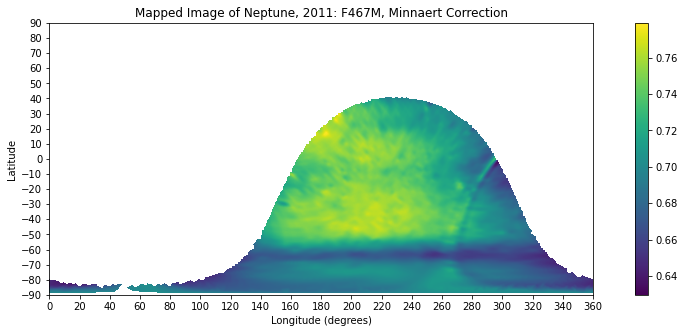

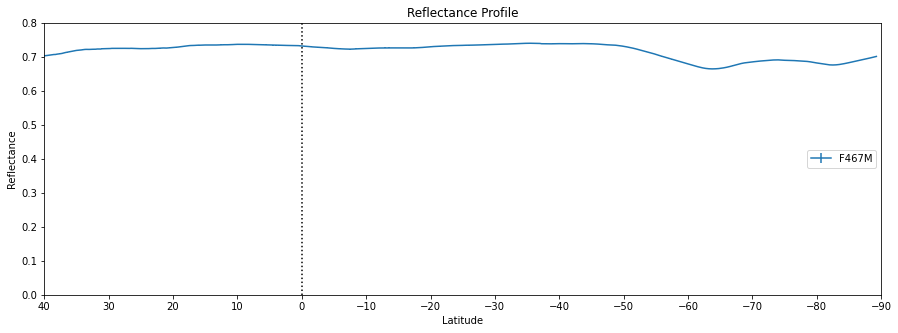

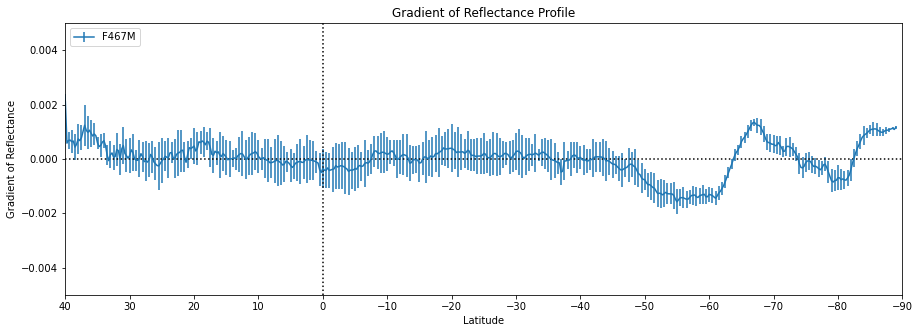

In [6]:
file = get_pkg_data_filename('maps/2011/467_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[1])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

R = np.zeros(resolution[0])
Rstd = np.zeros(resolution[0])
for j in range(resolution[0]): 
    R[j] = np.mean(data[j][np.where(np.isnan(data[j])==False)])
    Rstd[j] = sem(data[j][np.where(np.isnan(data[j])==False)])
R2011467 = R
GradR2011467 = np.gradient(R)
Rstd2011467 = Rstd
GradRErr2011467 = graderr(R,Rstd,10)

plt.figure(figsize=(15,5))
plt.imshow(data, cmap='viridis', extent=[0,360,-90,90])
plt.title('Mapped Image of Neptune, 2011: F467M, Minnaert Correction')
plt.xlabel("Longitude (degrees)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar()

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
axR.errorbar(lat, R2011467, yerr = Rstd2011467, label = 'F467M', errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,0.8]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
axR.errorbar(lat, GradR2011467, yerr=GradRErr2011467, label = 'F467M', errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

# Year 2011, F845M

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


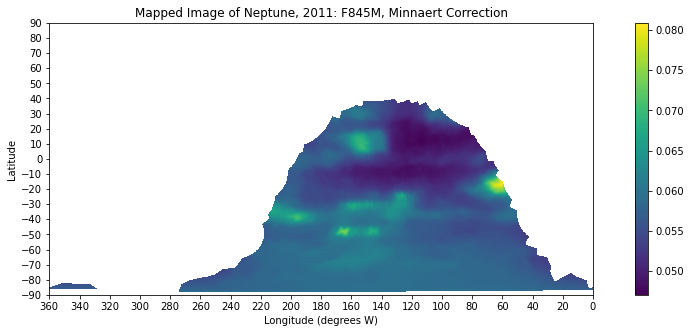

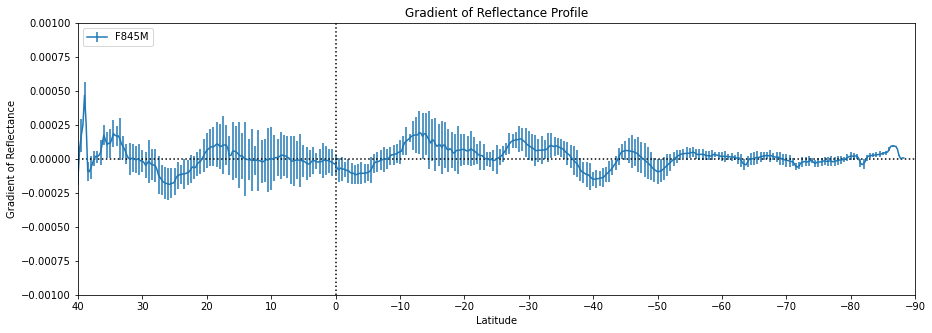

In [3]:
file = get_pkg_data_filename('maps/2011/845_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

R = np.zeros(resolution[0])
Rstd = np.zeros(resolution[0])
for j in range(resolution[0]): 
    R[j] = np.mean(data[j][np.where(np.isnan(data[j])==False)])
    Rstd[j] = sem(data[j][np.where(np.isnan(data[j])==False)])
R2011845 = R
GradR2011845 = np.gradient(R)
Rstd2011845 = Rstd
GradRErr2011845 = graderr(R,Rstd,10)

plt.figure(figsize=(15,5))
plt.imshow(data, cmap='viridis', extent=[360,0,-90,90])
plt.title('Mapped Image of Neptune, 2011: F845M, Minnaert Correction')
plt.xlabel("Longitude (degrees W)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar()

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, R2011845, yerr = Rstd2011845, label = 'F845M', errorevery = degpererrbar*2)
# plt.title('Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Reflectance')
# plt.ylim([0,0.1]) #reflectance limit setting
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='center right')

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
axR.errorbar(lat, GradR2011845, yerr=GradRErr2011845, label = 'F845M', errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.001,0.001]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

# Year 2011 All Filters

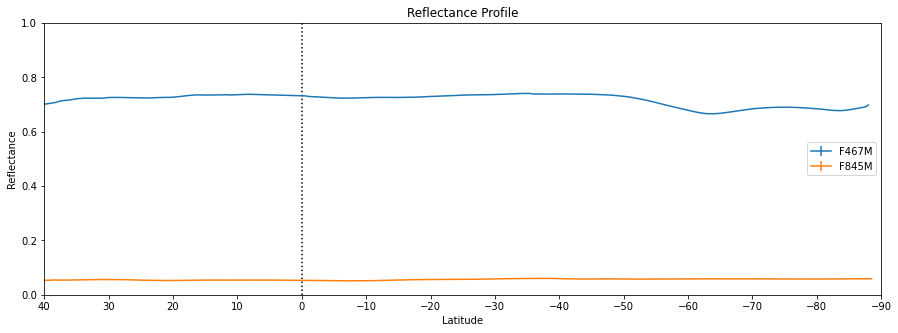

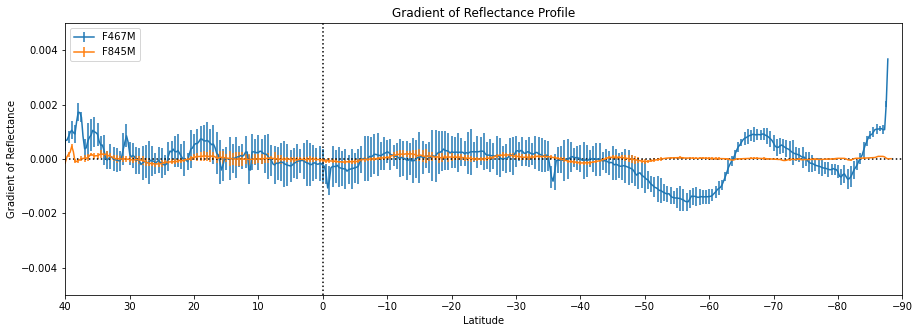

In [21]:
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
axR.errorbar(lat, R2011467, yerr = Rstd2011467, label = 'F467M', errorevery = degpererrbar*2)
axR.errorbar(lat, R2011845, yerr = Rstd2011845, label = 'F845M', errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,1]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
axR.errorbar(lat, GradR2011467, yerr=GradRErr2011467, label = 'F467M', errorevery = degpererrbar*2)
axR.errorbar(lat, GradR2011845, yerr=GradRErr2011845, label = 'F845M', errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.005,0.005]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

# Year 2010, F467M

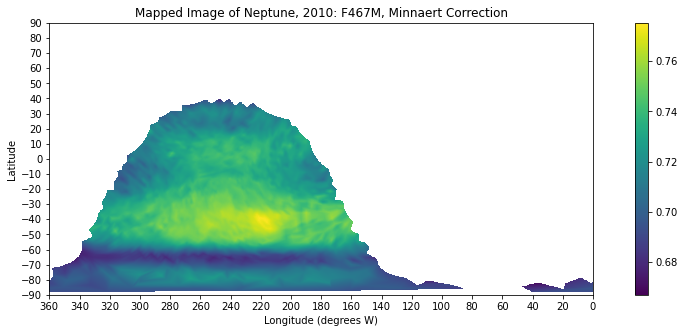

In [22]:
file = get_pkg_data_filename('maps/2010/467_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

R = np.zeros(resolution[0])
Rstd = np.zeros(resolution[0])
for j in range(resolution[0]): 
    R[j] = np.mean(data[j][np.where(np.isnan(data[j])==False)])
    Rstd[j] = sem(data[j][np.where(np.isnan(data[j])==False)])
R2010467 = R
GradR2010467 = np.gradient(R)
Rstd2010467 = Rstd
GradRErr2010467 = graderr(R,Rstd,10)

plt.figure(figsize=(15,5))
plt.imshow(data, cmap='viridis', extent=[360,0,-90,90])
plt.title('Mapped Image of Neptune, 2010: F467M, Minnaert Correction')
plt.xlabel("Longitude (degrees W)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar()

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, R2010467, yerr = Rstd2010467, label = 'F467M', errorevery = degpererrbar*2)
# plt.title('Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Reflectance')
# plt.ylim([0,0.8]) #reflectance limit setting
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='center right')

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, GradR2010467, yerr=GradRErr2010467, label = 'F467M', errorevery = degpererrbar*2)
# plt.title('Gradient of Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Gradient of Reflectance')
# plt.ylim([-0.005,0.005]) #reflectance limit setting
# plt.axhline(y=0, color='black', ls=':')
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='upper left')

# Year 2010, F547M

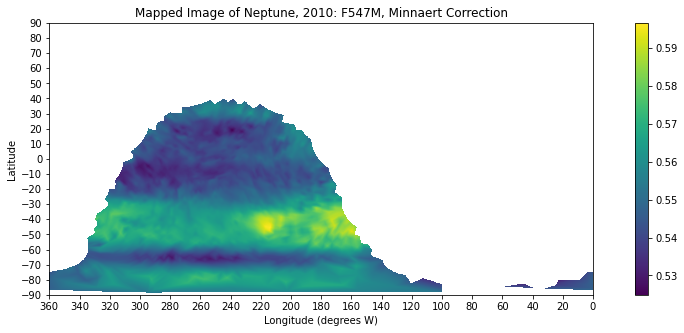

In [23]:
file = get_pkg_data_filename('maps/2010/547_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

R = np.zeros(resolution[0])
Rstd = np.zeros(resolution[0])
for j in range(resolution[0]): 
    R[j] = np.mean(data[j][np.where(np.isnan(data[j])==False)])
    Rstd[j] = sem(data[j][np.where(np.isnan(data[j])==False)])
R2010547 = R
GradR2010547 = np.gradient(R)
Rstd2010547 = Rstd
GradRErr2010547 = graderr(R,Rstd,10)

plt.figure(figsize=(15,5))
plt.imshow(data, cmap='viridis', extent=[360,0,-90,90])
plt.title('Mapped Image of Neptune, 2010: F547M, Minnaert Correction')
plt.xlabel("Longitude (degrees W)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar()

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, R2010547, yerr = Rstd2010547, label = 'F547M', errorevery = degpererrbar*2)
# plt.title('Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Reflectance')
# plt.ylim([0,0.8]) #reflectance limit setting
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='center right')

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, GradR2010547, yerr=GradRErr2010547, label = 'F547M', errorevery = degpererrbar*2)
# plt.title('Gradient of Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Gradient of Reflectance')
# plt.ylim([-0.005,0.005]) #reflectance limit setting
# plt.axhline(y=0, color='black', ls=':')
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='upper left')

# Year 2010, FQ619N

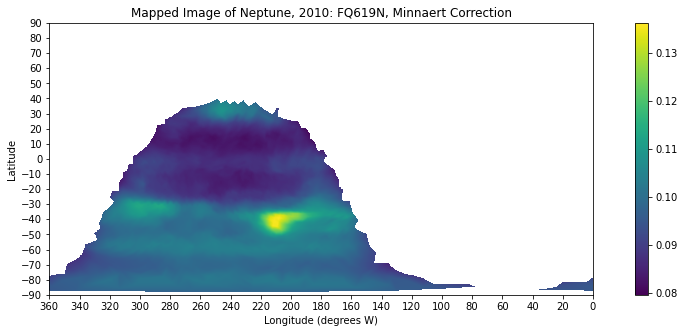

In [24]:
file = get_pkg_data_filename('maps/2010/619_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

R = np.zeros(resolution[0])
Rstd = np.zeros(resolution[0])
for j in range(resolution[0]): 
    R[j] = np.mean(data[j][np.where(np.isnan(data[j])==False)])
    Rstd[j] = sem(data[j][np.where(np.isnan(data[j])==False)])
R2010619 = R
GradR2010619 = np.gradient(R)
Rstd2010619 = Rstd
GradRErr2010619 = graderr(R,Rstd,10)

plt.figure(figsize=(15,5))
plt.imshow(data, cmap='viridis', extent=[360,0,-90,90])
plt.title('Mapped Image of Neptune, 2010: FQ619N, Minnaert Correction')
plt.xlabel("Longitude (degrees W)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar()

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, R2010619, yerr = Rstd2010619, label = 'FQ619N', errorevery = degpererrbar*2)
# plt.title('Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Reflectance')
# plt.ylim([0,0.8]) #reflectance limit setting
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='center right')

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, GradR2010619, yerr=GradRErr2010619, label = 'FQ619N', errorevery = degpererrbar*2)
# plt.title('Gradient of Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Gradient of Reflectance')
# plt.ylim([-0.005,0.005]) #reflectance limit setting
# plt.axhline(y=0, color='black', ls=':')
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='upper left')

# Year 2010, FQ727N

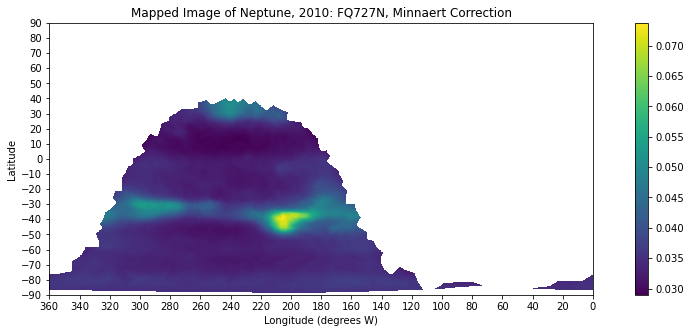

In [25]:
file = get_pkg_data_filename('maps/2010/727_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

R = np.zeros(resolution[0])
Rstd = np.zeros(resolution[0])
for j in range(resolution[0]): 
    R[j] = np.mean(data[j][np.where(np.isnan(data[j])==False)])
    Rstd[j] = sem(data[j][np.where(np.isnan(data[j])==False)])
R2010727 = R
GradR2010727 = np.gradient(R)
Rstd2010727 = Rstd
GradRErr2010727 = graderr(R,Rstd,10)

plt.figure(figsize=(15,5))
plt.imshow(data, cmap='viridis', extent=[360,0,-90,90])
plt.title('Mapped Image of Neptune, 2010: FQ727N, Minnaert Correction')
plt.xlabel("Longitude (degrees W)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar()

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, R2010727, yerr = Rstd2010727, label = 'FQ727N', errorevery = degpererrbar*2)
# plt.title('Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Reflectance')
# plt.ylim([0,0.8]) #reflectance limit setting
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='center right')

# plt.figure(figsize=(15,5)) #set up a afigure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, GradR2010727, yerr=GradRErr2010727, label = 'FQ727N', errorevery = degpererrbar*2)
# plt.title('Gradient of Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Gradient of Reflectance')
# plt.ylim([-0.005,0.005]) #reflectance limit setting
# plt.axhline(y=0, color='black', ls=':')
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='upper left')

# Year 2010, F845M

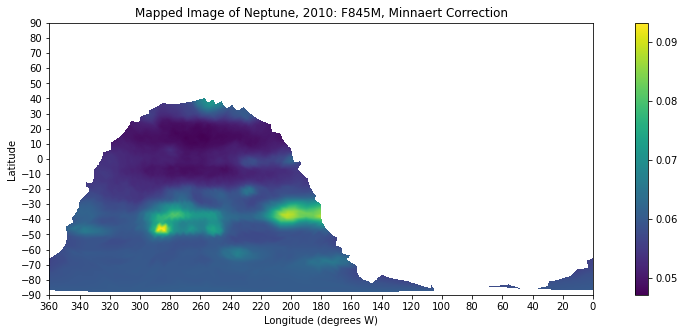

In [30]:
file = get_pkg_data_filename('maps/2010/845_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

R = np.zeros(resolution[0])
Rstd = np.zeros(resolution[0])
for j in range(resolution[0]): 
    R[j] = np.mean(data[j][np.where(np.isnan(data[j])==False)])
    Rstd[j] = sem(data[j][np.where(np.isnan(data[j])==False)])
R2010845 = R
GradR2010845 = np.gradient(R)
Rstd2010845 = Rstd
GradRErr2010845 = graderr(R,Rstd,10)

plt.figure(figsize=(15,5))
plt.imshow(data, cmap='viridis', extent=[360,0,-90,90])
plt.title('Mapped Image of Neptune, 2010: F845M, Minnaert Correction')
plt.xlabel("Longitude (degrees W)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar()

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, R2010845, yerr = Rstd2010845, label = 'F845M', errorevery = degpererrbar*2)
# plt.title('Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Reflectance')
# plt.ylim([0,0.1]) #reflectance limit setting
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='center right')

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, GradR2010845, yerr=GradRErr2010845, label = 'F845M', errorevery = degpererrbar*2)
# plt.title('Gradient of Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Gradient of Reflectance')
# plt.ylim([-0.001,0.001]) #reflectance limit setting
# plt.axhline(y=0, color='black', ls=':')
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='upper left')

# Year 2010 All Filters

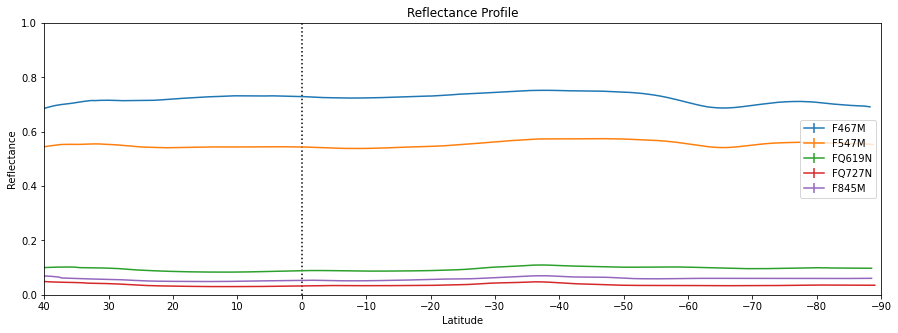

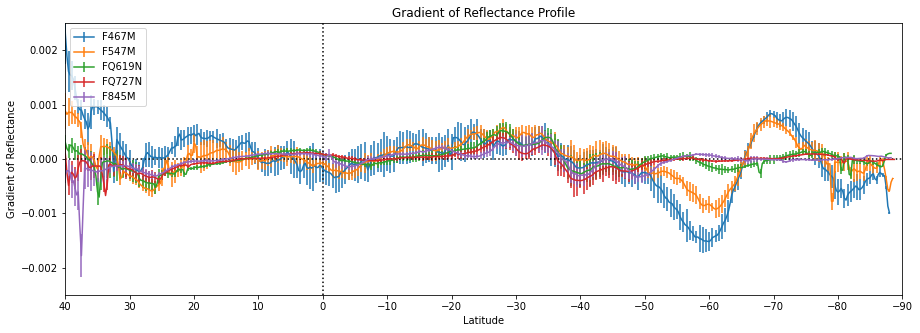

In [32]:
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
axR.errorbar(lat, R2010467, yerr = Rstd2010467, label = 'F467M', errorevery = degpererrbar*2)
axR.errorbar(lat, R2010547, yerr = Rstd2010547, label = 'F547M', errorevery = degpererrbar*2)
axR.errorbar(lat, R2010619, yerr = Rstd2010619, label = 'FQ619N', errorevery = degpererrbar*2)
axR.errorbar(lat, R2010727, yerr = Rstd2010727, label = 'FQ727N', errorevery = degpererrbar*2)
axR.errorbar(lat, R2010845, yerr = Rstd2010845, label = 'F845M', errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')a
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,1]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
axR.errorbar(lat, GradR2010467, yerr=GradRErr2010467, label = 'F467M', errorevery = degpererrbar*2)
axR.errorbar(lat, GradR2010547, yerr=GradRErr2010547, label = 'F547M', errorevery = degpererrbar*2)
axR.errorbar(lat, GradR2010619, yerr=GradRErr2010619, label = 'FQ619N', errorevery = degpererrbar*2)
axR.errorbar(lat, GradR2010727, yerr=GradRErr2010727, label = 'FQ727N', errorevery = degpererrbar*2)
axR.errorbar(lat, GradR2010845, yerr=GradRErr2010845, label = 'F845M', errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.0025,0.0025]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

# Year 2009, F467M

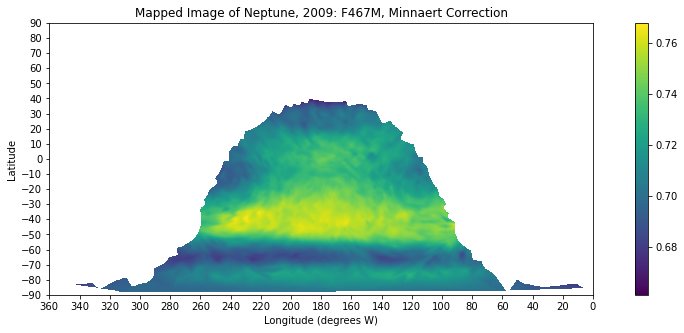

In [33]:
file = get_pkg_data_filename('maps/2009/467_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

R = np.zeros(resolution[0])
Rstd = np.zeros(resolution[0])
for j in range(resolution[0]): 
    R[j] = np.mean(data[j][np.where(np.isnan(data[j])==False)])
    Rstd[j] = sem(data[j][np.where(np.isnan(data[j])==False)])
R2009467 = R
GradR2009467 = np.gradient(R)
Rstd2009467 = Rstd
GradRErr2009467 = graderr(R,Rstd,10)

plt.figure(figsize=(15,5))
plt.imshow(data, cmap='viridis', extent=[360,0,-90,90])
plt.title('Mapped Image of Neptune, 2009: F467M, Minnaert Correction')
plt.xlabel("Longitude (degrees W)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar()

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, R2009467, yerr = Rstd2009467, label = 'F467M', errorevery = degpererrbar*2)
# plt.title('Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Reflectance')
# plt.ylim([0,0.8]) #reflectance limit setting
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='center right')

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, GradR2009467, yerr=GradRErr2009467, label = 'F467M', errorevery = degpererrbar*2)
# plt.title('Gradient of Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Gradient of Reflectance')
# plt.ylim([-0.005,0.005]) #reflectance limit setting
# plt.axhline(y=0, color='black', ls=':')
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='upper left')

# Year 2009, F547M

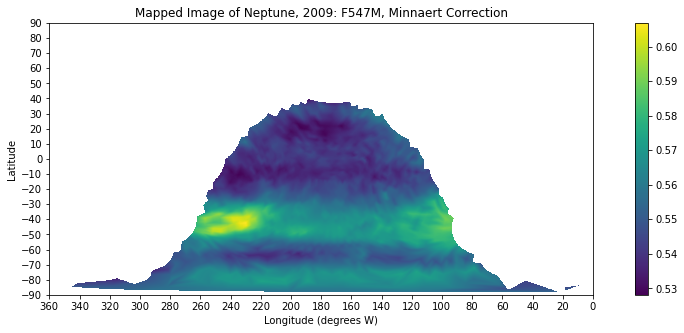

In [34]:
file = get_pkg_data_filename('maps/2009/547_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

R = np.zeros(resolution[0])
Rstd = np.zeros(resolution[0])
for j in range(resolution[0]): 
    R[j] = np.mean(data[j][np.where(np.isnan(data[j])==False)])
    Rstd[j] = sem(data[j][np.where(np.isnan(data[j])==False)])
R2009547 = R
GradR2009547 = np.gradient(R)
Rstd2009547 = Rstd
GradRErr2009547 = graderr(R,Rstd,10)

plt.figure(figsize=(15,5))
plt.imshow(data, cmap='viridis', extent=[360,0,-90,90])
plt.title('Mapped Image of Neptune, 2009: F547M, Minnaert Correction')
plt.xlabel("Longitude (degrees W)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar()

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, R2009547, yerr = Rstd2009547, label = 'F547M', errorevery = degpererrbar*2)
# plt.title('Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Reflectance')
# plt.ylim([0,0.8]) #reflectance limit setting
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='center right')

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, GradR2009547, yerr=GradRErr2009547, label = 'F547M', errorevery = degpererrbar*2)
# plt.title('Gradient of Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Gradient of Reflectance')
# plt.ylim([-0.005,0.005]) #reflectance limit setting
# plt.axhline(y=0, color='black', ls=':')
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='upper left')

# Year 2009, FQ619N

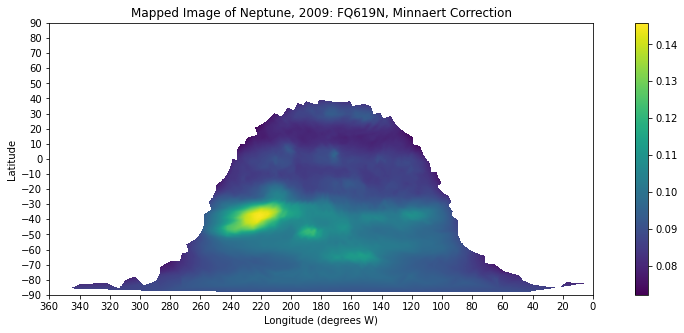

In [35]:
file = get_pkg_data_filename('maps/2009/619_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

R = np.zeros(resolution[0])
Rstd = np.zeros(resolution[0])
for j in range(resolution[0]): 
    R[j] = np.mean(data[j][np.where(np.isnan(data[j])==False)])
    Rstd[j] = sem(data[j][np.where(np.isnan(data[j])==False)])
R2009619 = R
GradR2009619 = np.gradient(R)
Rstd2009619 = Rstd
GradRErr2009619 = graderr(R,Rstd,10)

plt.figure(figsize=(15,5))
plt.imshow(data, cmap='viridis', extent=[360,0,-90,90])
plt.title('Mapped Image of Neptune, 2009: FQ619N, Minnaert Correction')
plt.xlabel("Longitude (degrees W)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar()

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, R2009619, yerr = Rstd2009619, label = 'FQ619N', errorevery = degpererrbar*2)
# plt.title('Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Reflectance')
# plt.ylim([0,0.8]) #reflectance limit setting
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='center right')

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, GradR2009619, yerr=GradRErr2009619, label = 'FQ619N', errorevery = degpererrbar*2)
# plt.title('Gradient of Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Gradient of Reflectance')
# plt.ylim([-0.005,0.005]) #reflectance limit setting
# plt.axhline(y=0, color='black', ls=':')
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='upper left')

# Year 2009, FQ727N

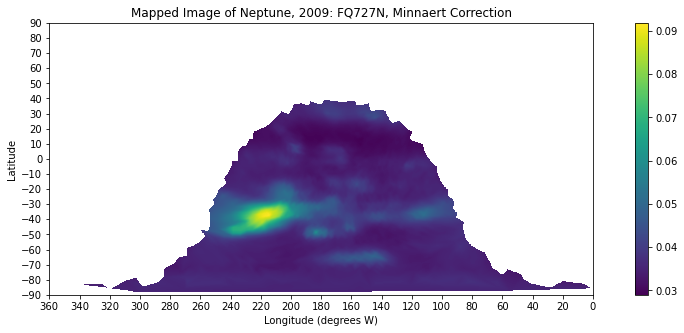

In [40]:
file = get_pkg_data_filename('maps/2009/727_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

R = np.zeros(resolution[0])
Rstd = np.zeros(resolution[0])
for j in range(resolution[0]): 
    R[j] = np.mean(data[j][np.where(np.isnan(data[j])==False)])
    Rstd[j] = sem(data[j][np.where(np.isnan(data[j])==False)])
R2009727 = R
GradR2009727 = np.gradient(R)
Rstd2009727 = Rstd
GradRErr2009727 = graderr(R,Rstd,10)

plt.figure(figsize=(15,5))
plt.imshow(data, cmap='viridis', extent=[360,0,-90,90])
plt.title('Mapped Image of Neptune, 2009: FQ727N, Minnaert Correction')
plt.xlabel("Longitude (degrees W)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar()

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, R2009727, yerr = Rstd2009727, label = 'FQ727N', errorevery = degpererrbar*2)
# plt.title('Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Reflectance')
# plt.ylim([0,0.8]) #reflectance limit setting
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='center right')

# plt.figure(figsize=(15,5)) #set up a afigure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, GradR2009727, yerr=GradRErr2009727, label = 'FQ727N', errorevery = degpererrbar*2)
# plt.title('Gradient of Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Gradient of Reflectance')
# plt.ylim([-0.005,0.005]) #reflectance limit setting
# plt.axhline(y=0, color='black', ls=':')
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='upper left')

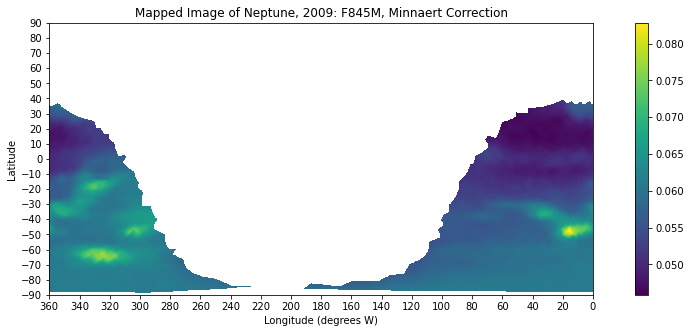

In [37]:
file = get_pkg_data_filename('maps/2009/845_1.fits')
data = ast.getdata(file,ext=0)
resolution = data.shape

lat = -1*(((180/resolution[0])*np.arange(resolution[0]))-90)
latticks = [-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

long = (360/resolution[0])*np.arange(resolution[1])
longticks = [0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]

R = np.zeros(resolution[0])
Rstd = np.zeros(resolution[0])
for j in range(resolution[0]): 
    R[j] = np.mean(data[j][np.where(np.isnan(data[j])==False)])
    Rstd[j] = sem(data[j][np.where(np.isnan(data[j])==False)])
R2009845 = R
GradR2009845 = np.gradient(R)
Rstd2009845 = Rstd
GradRErr2009845 = graderr(R,Rstd,10)

plt.figure(figsize=(15,5))
plt.imshow(data, cmap='viridis', extent=[360,0,-90,90])
plt.title('Mapped Image of Neptune, 2009: F845M, Minnaert Correction')
plt.xlabel("Longitude (degrees W)")
plt.ylabel("Latitude")
plt.xticks(longticks)
plt.yticks(latticks)
plt.colorbar()

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, R2009845, yerr = Rstd2009845, label = 'F845M', errorevery = degpererrbar*2)
# plt.title('Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Reflectance')
# plt.ylim([0,0.1]) #reflectance limit setting
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='center right')

# plt.figure(figsize=(15,5)) #set up a figure space
# axR = plt.subplot(111) #create a set of axes within the figure
# axR.errorbar(lat, GradR2009845, yerr=GradRErr2009845, label = 'F845M', errorevery = degpererrbar*2)
# plt.title('Gradient of Reflectance Profile')
# plt.xticks(latticks)
# plt.xlabel('Latitude')
# plt.xlim(latlimits) #latitude limit setting
# plt.ylabel('Gradient of Reflectance')
# plt.ylim([-0.001,0.001]) #reflectance limit setting
# plt.axhline(y=0, color='black', ls=':')
# plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
# plt.legend(loc='upper left')

# Year 2009 All Filters

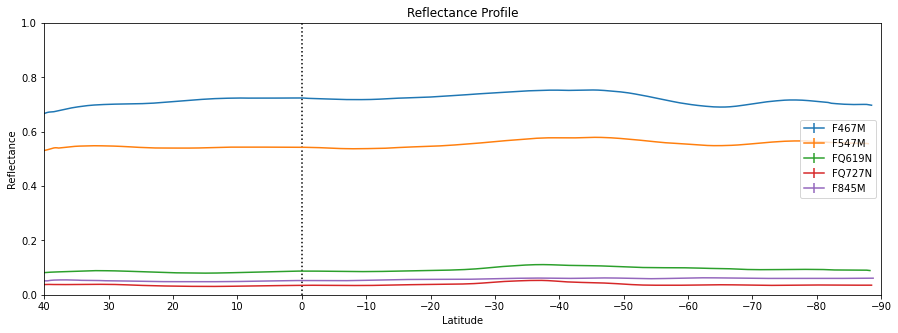

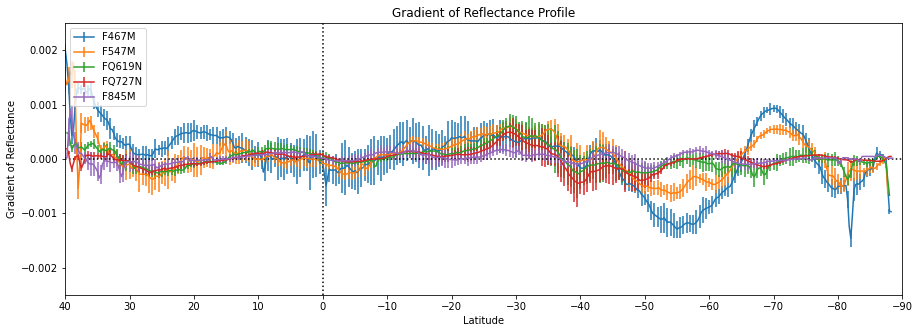

In [41]:
plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
axR.errorbar(lat, R2009467, yerr = Rstd2009467, label = 'F467M', errorevery = degpererrbar*2)
axR.errorbar(lat, R2009547, yerr = Rstd2009547, label = 'F547M', errorevery = degpererrbar*2)
axR.errorbar(lat, R2009619, yerr = Rstd2009619, label = 'FQ619N', errorevery = degpererrbar*2)
axR.errorbar(lat, R2009727, yerr = Rstd2009727, label = 'FQ727N', errorevery = degpererrbar*2)
axR.errorbar(lat, R2009845, yerr = Rstd2009845, label = 'F845M', errorevery = degpererrbar*2)
plt.title('Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Reflectance')
plt.ylim([0,1]) #reflectance limit setting
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='center right')

plt.figure(figsize=(15,5)) #set up a figure space
axR = plt.subplot(111) #create a set of axes within the figure
axR.errorbar(lat, GradR2009467, yerr=GradRErr2009467, label = 'F467M', errorevery = degpererrbar*2)
axR.errorbar(lat, GradR2009547, yerr=GradRErr2009547, label = 'F547M', errorevery = degpererrbar*2)
axR.errorbar(lat, GradR2009619, yerr=GradRErr2009619, label = 'FQ619N', errorevery = degpererrbar*2)
axR.errorbar(lat, GradR2009727, yerr=GradRErr2009727, label = 'FQ727N', errorevery = degpererrbar*2)
axR.errorbar(lat, GradR2009845, yerr=GradRErr2009845, label = 'F845M', errorevery = degpererrbar*2)
plt.title('Gradient of Reflectance Profile')
plt.xticks(latticks)
plt.xlabel('Latitude')
plt.xlim(latlimits) #latitude limit setting
plt.ylabel('Gradient of Reflectance')
plt.ylim([-0.0025,0.0025]) #reflectance limit setting
plt.axhline(y=0, color='black', ls=':')
plt.axvline(x=0, color='black', ls=':') #plots line at neptunian equator
plt.legend(loc='upper left')

720
200
800
1000


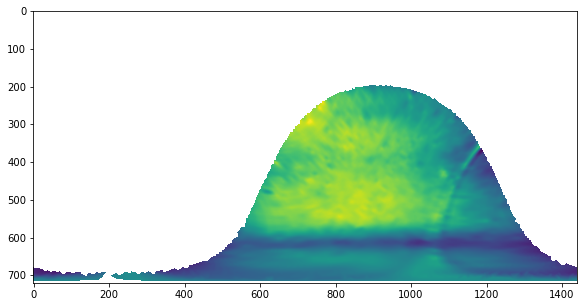

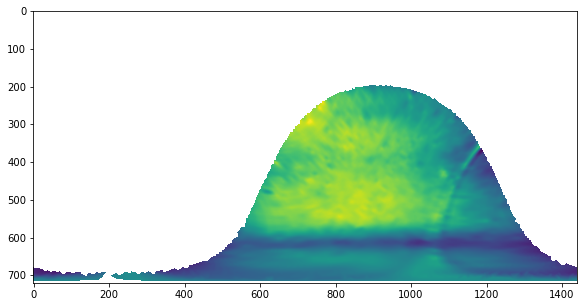

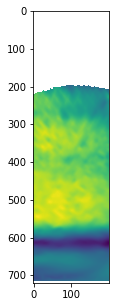

In [4]:
from RefFunc import *

plt.figure(figsize=(15,5))
plt.imshow(data)

img = restrict_long(data, 1000, 800)

plt.figure(figsize=(15,5))
plt.imshow(img)